In [1]:
# Libraries
# Libraries being used\n",
''' To install new libraries all install commands should bei n the anaconda terminal.
    "Open Anaconda Prompt -> type: activate projectName -> then the install command (pip or conda)'''
import pandas as pd
#import scikit
import os
import numpy as np
# pip install fredapi
# https://github.com/mortada/fredapi documentation
from fredapi import Fred

In [2]:
# Loading Data sets
df = pd.read_csv(os.path.join("data", "Log Differences GDPC1.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 333 entries, datestr to GDPC1_20190101logdifference
dtypes: float64(328), int64(2), object(3)
memory usage: 611.4+ KB


In [3]:
# Stripping down douplicate columns
column_counts = {}
for column_name in df.columns:
    if column_name[:-15] in column_counts:
        column_counts[column_name[:-15]].append(column_name)
    else:
        column_counts[column_name[:-15]] = [column_name]
        
duplicates = []
for column_name in column_counts:
    if len(column_counts[column_name]) > 1:
        duplicates.append(column_counts[column_name])

# First index always has non-time series columns
for i in duplicates[1:]:
    for key in i[:-1]:
        df.drop(key, axis="columns", inplace=True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 323 entries, datestr to GDPC1_20190101logdifference
dtypes: float64(318), int64(2), object(3)
memory usage: 593.1+ KB


In [4]:
# Trimming all column names (removing day and string logdifference)
df = df.rename(columns = {original:original[:-15] for original in df.columns if "GDP" in original})

print(df.columns)
df.info()

Index(['datestr', 'daten', 'newyq', 'Year', 'qrt', 'GDPC1_199112',
       'GDPC1_199201', 'GDPC1_199202', 'GDPC1_199203', 'GDPC1_199204',
       ...
       'GDPC1_201804', 'GDPC1_201805', 'GDPC1_201806', 'GDPC1_201807',
       'GDPC1_201808', 'GDPC1_201809', 'GDPC1_201810', 'GDPC1_201811',
       'GDPC1_201812', 'GDPC1_201901'],
      dtype='object', length=323)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 323 entries, datestr to GDPC1_201901
dtypes: float64(318), int64(2), object(3)
memory usage: 593.1+ KB


In [5]:
# Save all data sets
df.to_csv(os.path.join("data", "Cleaned_log_diff_GDP.csv"))

In [6]:
# Now dealing with unrate
unrate = pd.read_csv(os.path.join("data", "UNRATE vintages.csv"))
t = unrate.transpose()
t.columns = t.iloc[0]
t.columns
#t
#temp = t['datestr']
#t.groupby(pd.PeriodIndex(df.columns[1:], freq='Q'), axis=1).mean()


Index(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01', '1960-05-01',
       '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
       ...
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
       '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01'],
      dtype='object', name='datestr', length=707)

In [7]:
t.iloc[0]

datestr
1960-01-01    1960-01-01
1960-02-01    1960-02-01
1960-03-01    1960-03-01
1960-04-01    1960-04-01
1960-05-01    1960-05-01
1960-06-01    1960-06-01
1960-07-01    1960-07-01
1960-08-01    1960-08-01
1960-09-01    1960-09-01
1960-10-01    1960-10-01
1960-11-01    1960-11-01
1960-12-01    1960-12-01
1961-01-01    1961-01-01
1961-02-01    1961-02-01
1961-03-01    1961-03-01
1961-04-01    1961-04-01
1961-05-01    1961-05-01
1961-06-01    1961-06-01
1961-07-01    1961-07-01
1961-08-01    1961-08-01
1961-09-01    1961-09-01
1961-10-01    1961-10-01
1961-11-01    1961-11-01
1961-12-01    1961-12-01
1962-01-01    1962-01-01
1962-02-01    1962-02-01
1962-03-01    1962-03-01
1962-04-01    1962-04-01
1962-05-01    1962-05-01
1962-06-01    1962-06-01
                 ...    
2016-06-01    2016-06-01
2016-07-01    2016-07-01
2016-08-01    2016-08-01
2016-09-01    2016-09-01
2016-10-01    2016-10-01
2016-11-01    2016-11-01
2016-12-01    2016-12-01
2017-01-01    2017-01-01
2017-02-01    201

In [3]:
unemp = pd.read_csv(os.path.join("data", "Differenced Unemployment.csv"))
gdp = pd.read_csv(os.path.join("data", "CSV changed indices to numeric.csv"))

# Mapping out first graph index 0 - 127 gdp
# Unemployment goes 1-128


In [9]:
from sklearn import linear_model
# Prep linear model
y = unemp['UNRATE_19911206difference'].values[1:127]
x = gdp['i_gdpc1_19911204logdifference'].values[0:126]
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()

regr.fit(x,y)

predict_x = gdp['i_gdpc1_19940428logdifference'].values[127:136].reshape(9,1)

predict_y = regr.predict(predict_x)
#regr.predict([unemp['UNRATE_19940401difference'][128:137]])

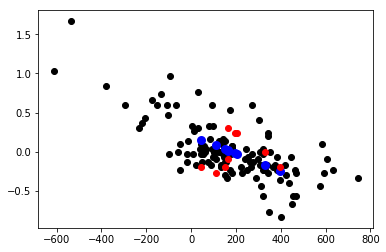

-0.4174174043397205


In [11]:
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
plt.scatter(predict_x, predict_y, color='blue', linewidth=3)
plt.scatter(predict_x, unemp['UNRATE_19940401difference'].values[127:136], color='red')
#plt.xticks(())
#plt.yticks(())
plt.show()

#TODO
# Add lag times for predicting, right now it predicts the same year, needs to reach out x quarters
from sklearn.metrics import r2_score

print(r2_score(unemp['UNRATE_19940401difference'].values[127:136], predict_y))

In [34]:
# todo
# Double check the indexes line up. 

# Unrate goes YearMonthDay
 
# GDP goes by YearMonth
#  Note missing data in 1995 nov/dec.  However quarter 4 starts in october so no big deal

# Plan is take 1st observation of each quarter for predictions

# 

# PAarsing unrate pattern
# UNRATE_<YEAR><MONTH><DAY>difference
# 4 digit year, 2 digit month/day

# gdp pattern
# i_gdpc1_<YEAR><MONTH><DAY>logdifference
# Same sizes

# QUarter hit list is Jan, Aprl, Jul, Oct.   1, 4, 7, 10

gdp_columns = gdp.columns

len(gdp_columns)

# Start 1992 Q1  End 2018Q3


# GDP Setup *******
gdp_using = []
# Setup as Quarter number : Quarter Month
quarters = {1:1, 2:4, 3:7, 4:10}
q = 1
year = 1992
for c in gdp_columns:
    # Restart quarter count
    if q > 4:
        q = 1
        year += 1
    
    # We have two sets of columns for each data set
    # currently using the non chained set?
    if "i_gdpc1" in c:
        # Years are at 8:12
        #print(c[8:12])
        if c[8:12] == str(year):
            if int(c[12:14]) >= quarters[q]:
                gdp_using.append(c)
                q += 1
        #Months are at 12:14
        #print(c[12:14])
        #Days are at 15:17
        #print(c[14:16])
        
# unemp SETUP ******
unemp_using = []
q = 1
year = 1992
for c in unemp.columns:
    if q > 4:
        q = 1
        year += 1
    # year 7:11
    # Month 11:13
    if c[7:11] == str(year):
        if int(c[11:13]) >= quarters[q]:
            unemp_using.append(c)
            q += 1


In [36]:
# Sanity check counting number of occurances per year
# (note indexing different for each)
dumb_count = {}
for i in unemp_using:
    if i[7:11] in dumb_count:
        dumb_count[i[7:11]] += 1
    else:
        dumb_count[i[7:11]] = 1
    #print(i[8:12])

# Checking how the days line up
#for g, u in zip(gdp_using, unemp_using):
#    print(g[14:16], u[13:15])
print(dumb_count)
len(dumb_count)

{'1992': 4, '1993': 4, '1994': 4, '1995': 4, '1996': 4, '1997': 4, '1998': 4, '1999': 4, '2000': 4, '2001': 4, '2002': 4, '2003': 4, '2004': 4, '2005': 4, '2006': 4, '2007': 4, '2008': 4, '2009': 4, '2010': 4, '2011': 4, '2012': 4, '2013': 4, '2014': 4, '2015': 4, '2016': 4, '2017': 4, '2018': 4, '2019': 1}


28

In [78]:
gdp_using
unemp_using

# Note due to differencing Q1 of unemp is blank and needs to be dropped
filtered_unemp = unemp[unemp_using]
filtered_unemp = filtered_unemp.drop(filtered_unemp.index[0])
filtered_gdp   = gdp[gdp_using]

# Stripping days out to make indexing by column easier
filtered_unemp.columns = [i[:-12] for i in filtered_unemp.columns]
filtered_gdp.columns = [i[:-15] for i in filtered_gdp.columns]

print(filtered_gdp)
# Checking column counts
#for u, g in zip(filtered_unemp.count(), filtered_gdp.count()):
#    print(u, g)

     i_gdpc1_199201  i_gdpc1_199204  i_gdpc1_199207  i_gdpc1_199210  \
0        -51.361693      -62.165204      -62.165204      -62.165204   
1         32.264235       23.925276       23.925276       23.925276   
2       -132.939454     -151.147873     -151.147873     -151.147873   
3        174.701777      195.352238      195.352238      195.352238   
4        344.384431      338.903892      338.903892      338.903892   
5        323.216294      341.064601      341.064601      341.064601   
6        469.277502      474.127833      474.127833      474.127833   
7        320.459150      308.260173      308.260173      308.260173   
8        241.964894      244.406922      244.406922      244.406922   
9        181.228899      186.889489      186.889489      186.889489   
10       -19.828944      -26.457350      -26.457350      -26.457350   
11       343.439107      336.135491      336.135491      336.135491   
12       319.243765      308.890381      308.890381      308.890381   
13    

In [72]:
from sklearn import linear_model

# Rename the columns to make skipping ahead by two years simple
#filtered_unemp.columns = 

#print(filtered_unemp.columns)


# Prep linear model

#for x, y in zip(filtered_unemp, filtered_gdp):
#    x = x.reshape(len(x), 1)
#    y = y.reshape(len(y), 1)
#    regr = linear_model.LinearRegression()
#    regr.fit(x,y)
#    predict_x = gdp['i_gdpc1_19940428logdifference'].values[127:136].reshape(9,1)
#    predict_y = regr.predict(predict_x)
    #regr.predict([unemp['UNRATE_19940401difference'][128:137]])


UNRATE_19920110difference
UNRATE_19920403difference
UNRATE_19920702difference
UNRATE_19921002difference
UNRATE_19930108difference
UNRATE_19930402difference
UNRATE_19930702difference
UNRATE_19931008difference
UNRATE_19940107difference
UNRATE_19940401difference
UNRATE_19940708difference
UNRATE_19941007difference
UNRATE_19950106difference
UNRATE_19950407difference
UNRATE_19950707difference
UNRATE_19951006difference
UNRATE_19960119difference
UNRATE_19960405difference
UNRATE_19960705difference
UNRATE_19961004difference
UNRATE_19970110difference
UNRATE_19970404difference
UNRATE_19970703difference
UNRATE_19971003difference
UNRATE_19980109difference
UNRATE_19980403difference
UNRATE_19980702difference
UNRATE_19981002difference
UNRATE_19990108difference
UNRATE_19990402difference
UNRATE_19990702difference
UNRATE_19991008difference
UNRATE_20000107difference
UNRATE_20000407difference
UNRATE_20000707difference
UNRATE_20001006difference
UNRATE_20010105difference
UNRATE_20010406difference
UNRATE_20010